In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Cuisine_Ratings.csv")

IT's Time for EDA part

In [ ]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Occupation,Budget,Cuisines,Alcohol,...,Visited restaurant often,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1.0,153.0,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,123.0,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,122.0,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,153.0,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,129.0,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets see the blanks column in the table

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   203 non-null    float64
 1   Area code                 197 non-null    float64
 2   Location                  204 non-null    object 
 3   Gender                    204 non-null    object 
 4   YOB                       204 non-null    int64  
 5   Marital Status            204 non-null    object 
 6   Occupation                204 non-null    object 
 7   Budget                    204 non-null    int64  
 8   Cuisines                  204 non-null    object 
 9   Alcohol                   204 non-null    object 
 10  Smoker                    204 non-null    object 
 11  Food Rating               204 non-null    object 
 12  Service Rating            204 non-null    int64  
 13  Overall Rating            204 non-null    float64
 14  Visited re

After reviewing the info section we found the column from unnamed 15 to unnamed 23 is empty so we drop that columns.

In [ ]:
df.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Occupation', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Visited restaurant often',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [ ]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'],axis=1)

Now again check the info of the table.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   203 non-null    float64
 1   Area code                 197 non-null    float64
 2   Location                  204 non-null    object 
 3   Gender                    204 non-null    object 
 4   YOB                       204 non-null    int64  
 5   Marital Status            204 non-null    object 
 6   Occupation                204 non-null    object 
 7   Budget                    204 non-null    int64  
 8   Cuisines                  204 non-null    object 
 9   Alcohol                   204 non-null    object 
 10  Smoker                    204 non-null    object 
 11  Food Rating               204 non-null    object 
 12  Service Rating            204 non-null    int64  
 13  Overall Rating            204 non-null    float64
 14  Visited re

In [ ]:
df.nunique()

,0
User ID,199
Area code,65
Location,10
Gender,2
YOB,46
Marital Status,3
Occupation,2
Budget,5
Cuisines,7
Alcohol,3


In [ ]:
df.sample()

,User ID,Area code,Location,Gender,YOB,Marital Status,Occupation,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Visited restaurant often
95,92.0,111.0,"China Town, NY",Male,1969,Divorced,Professional,3,French,Never,Often,3,1,2.0,No


Lets find the duplicate values in the table

In [ ]:
df.duplicated().sum()

np.int64(4)

Now drop the drop the duplicate rows

In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Occupation,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Visited restaurant often
0,1.0,153.0,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2.0,123.0,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3.0,122.0,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4.0,153.0,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5.0,129.0,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,196.0,175.0,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
200,197.0,170.0,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
201,198.0,160.0,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
202,199.0,130.0,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


In [ ]:
df.isnull().sum()

,0
User ID,1
Area code,7
Location,0
Gender,0
YOB,0
Marital Status,0
Occupation,0
Budget,0
Cuisines,0
Alcohol,0


In [ ]:
df[df['User ID'].isnull()]

,User ID,Area code,Location,Gender,YOB,Marital Status,Occupation,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Visited restaurant often
58,NaN,123.0,"St. George,NY",Female,1981,Divorced,Student,2,Italian,Socially,Often,5,5,5.0,No


In [ ]:
df.loc[57:59]

,User ID,Area code,Location,Gender,YOB,Marital Status,Occupation,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Visited restaurant often
57,56.0,122.0,"Upper West Side,NY",Female,1991,Single,Professional,4,Filipino,Often,Socially,3,1,2.0,NaN
58,NaN,123.0,"St. George,NY",Female,1981,Divorced,Student,2,Italian,Socially,Often,5,5,5.0,No
59,58.0,129.0,"Central Park,ny",Male,1962,Married,Professional,3,Filipino,Never,Never,3,4,3.5,No


In [ ]:
df['User ID']=df['User ID'].fillna(57.0)

In [ ]:
df.loc[57:59]

,User ID,Area code,Location,Gender,YOB,Marital Status,Occupation,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Visited restaurant often
57,56.0,122.0,"Upper West Side,NY",Female,1991,Single,Professional,4,Filipino,Often,Socially,3,1,2.0,NaN
58,57.0,123.0,"St. George,NY",Female,1981,Divorced,Student,2,Italian,Socially,Often,5,5,5.0,No
59,58.0,129.0,"Central Park,ny",Male,1962,Married,Professional,3,Filipino,Never,Never,3,4,3.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 203
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   200 non-null    float64
 1   Area code                 193 non-null    float64
 2   Location                  200 non-null    object 
 3   Gender                    200 non-null    object 
 4   YOB                       200 non-null    int64  
 5   Marital Status            200 non-null    object 
 6   Occupation                200 non-null    object 
 7   Budget                    200 non-null    int64  
 8   Cuisines                  200 non-null    object 
 9   Alcohol                   200 non-null    object 
 10  Smoker                    200 non-null    object 
 11  Food Rating               200 non-null    object 
 12  Service Rating            200 non-null    int64  
 13  Overall Rating            200 non-null    float64
 14  Visited restaur

In [ ]:
df['Visited restaurant often'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['Visited restaurant often'].mode()[0]

'No'

In [ ]:
df['Visited restaurant often']=df['Visited restaurant often'].fillna(df['Visited restaurant often'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 203
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   200 non-null    float64
 1   Area code                 193 non-null    float64
 2   Location                  200 non-null    object 
 3   Gender                    200 non-null    object 
 4   YOB                       200 non-null    int64  
 5   Marital Status            200 non-null    object 
 6   Occupation                200 non-null    object 
 7   Budget                    200 non-null    int64  
 8   Cuisines                  200 non-null    object 
 9   Alcohol                   200 non-null    object 
 10  Smoker                    200 non-null    object 
 11  Food Rating               200 non-null    object 
 12  Service Rating            200 non-null    int64  
 13  Overall Rating            200 non-null    float64
 14  Visited restaur

In [ ]:
df[df['Area code'].isnull()]

,User ID,Area code,Location,Gender,YOB,Marital Status,Occupation,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Visited restaurant often
7,8.0,NaN,"Upper East Side,NY",Female,2003,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes
19,19.0,NaN,"Central Park,NY",Male,2001,Single,Student,3,Filipino,Socially,Socially,3,5,4.0,No
21,21.0,NaN,"St. George,NY",Female,2009,Single,Student,3,Indian,Socially,Often,5,3,4.0,No
34,34.0,NaN,"Central Park,ny",Female,2009,Single,Professional,5,Indian,Socially,Socially,1,5,3.0,No
68,67.0,NaN,"China Town, NY",Male,2009,Single,Student,3,Seafood,Socially,Never,3,3,3.0,No
80,78.0,NaN,"Upper East Side,NY",Male,1979,Single,Student,5,Chinese,Socially,Never,5,1,3.0,No
82,80.0,NaN,"China Town, NY",Female,1998,Single,Student,1,Filipino,Often,Socially,1,5,3.0,No


In [ ]:
df['Area code'] = np.where((df['Area code'].isnull()) & (df['Location']=='China Town,NY'),110.0,df['Area code'])

In [ ]:
df['Area code'] = np.where((df['Area code'].isnull()) & (df['Location'] == 'UPPER EAST SIDE,NY'), 153.0, df['Area code'])

In [ ]:
df['Area code'] = np.where((df['Area code'].isnull()) & (df['Location'] == 'CENTRAL PARK,NY'), 129.0, df['Area code'])

In [ ]:
df['Area code'] = np.where((df['Area code'].isnull()) & (df['Location'] == 'ST. GEORGE,NY'), 123.0, df['Area code'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 203
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   200 non-null    float64
 1   Area code                 193 non-null    float64
 2   Location                  200 non-null    object 
 3   Gender                    200 non-null    object 
 4   YOB                       200 non-null    int64  
 5   Marital Status            200 non-null    object 
 6   Occupation                200 non-null    object 
 7   Budget                    200 non-null    int64  
 8   Cuisines                  200 non-null    object 
 9   Alcohol                   200 non-null    object 
 10  Smoker                    200 non-null    object 
 11  Food Rating               200 non-null    object 
 12  Service Rating            200 non-null    int64  
 13  Overall Rating            200 non-null    float64
 14  Visited restaur

Let see how many types of cuisine are there.

In [ ]:
Types_Cusinies = df.groupby(['Cuisines'])['Cuisines'].count().sort_values(ascending=False)

In [ ]:
Types_Cusinies

,Cuisines
Cuisines,
Japanese,36
French,34
Filipino,34
Indian,32
Chinese,24
Seafood,22
Italian,18


This analysis show that **Japanese cuisine** is the most demanding.
& *italian* is less demanding cusinie.

In [ ]:
## let see the overall rating of the cuisines.
Cusinies_Rating =df.groupby(['Cuisines'])['Overall Rating'].mean().sort_values(ascending=False)

In [ ]:
Cusinies_Rating

,Overall Rating
Cuisines,
Japanese,3.597222
Chinese,3.270833
Italian,3.194444
Indian,3.171875
Seafood,3.136364
French,3.102941
Filipino,3.044118


Most Rated Cuisine is **Japanese** & the least rated cuisine is **Filipino**

Let See is there is any difference in the rating by the genders.

In [ ]:
Gender_Rating_Count = df.groupby(['Gender'])['Overall Rating'].count().sort_values(ascending=False)
Gender_Rating_Mean = df.groupby(['Gender'])['Overall Rating'].mean().sort_values(ascending=False)

In [ ]:
[Gender_Rating_Mean], [Gender_Rating_Count]

([Gender
  Female    3.335366
  Male      3.148305
  Name: Overall Rating, dtype: float64],
 [Gender
  Male      118
  Female     82
  Name: Overall Rating, dtype: int64])

Let the Gender with somker and Drinkers.

In [ ]:
Gender_Somker_Count = df.groupby(['Gender'])['Smoker'].count().sort_values(ascending=False)

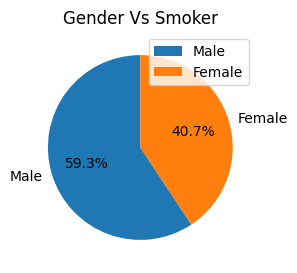

In [ ]:
## Create a Pie Chart
Gender_Somker_Count.plot(kind='pie',autopct='%1.1f%%',figsize=(3,3),startangle=90,legend=True)

plt.title('Gender Vs Smoker')

plt.ylabel('')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 203
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   200 non-null    float64
 1   Area code                 193 non-null    float64
 2   Location                  200 non-null    object 
 3   Gender                    200 non-null    object 
 4   YOB                       200 non-null    int64  
 5   Marital Status            200 non-null    object 
 6   Occupation                200 non-null    object 
 7   Budget                    200 non-null    int64  
 8   Cuisines                  200 non-null    object 
 9   Alcohol                   200 non-null    object 
 10  Smoker                    200 non-null    object 
 11  Food Rating               200 non-null    object 
 12  Service Rating            200 non-null    int64  
 13  Overall Rating            200 non-null    float64
 14  Visited restaur

In [ ]:
Budget_Rating = df.groupby(['Budget'])['Overall Rating'].mean().sort_values(ascending=False)

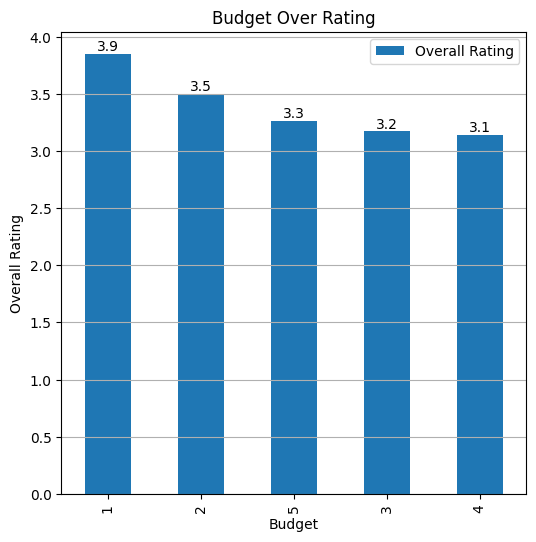

In [ ]:
ax=Budget_Rating.plot(kind='bar',figsize=(6,6),legend=True)

plt.title('Budget Over Rating')

plt.xlabel('Budget')

plt.ylabel('Overall Rating')

plt.grid(axis='y')

## add the value above the bar

ax.bar_label(ax.containers[0], fmt='%.1f')

plt.show()

This show that with less budget have the highest amount of rating.

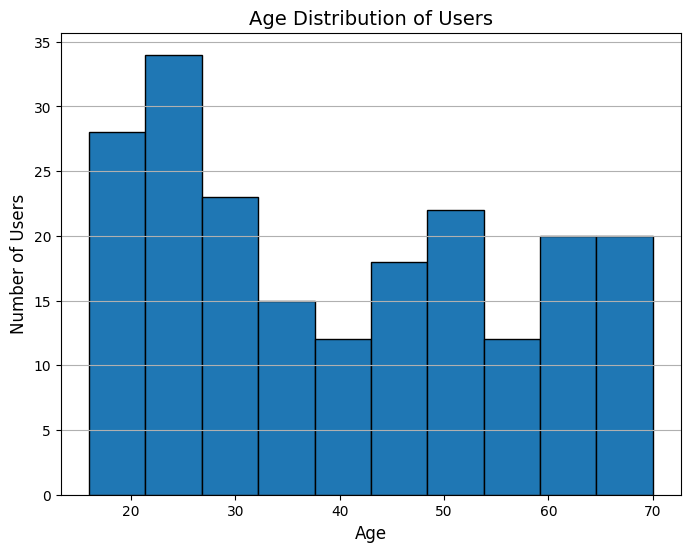

In [ ]:
# Calculate Age from Year of Birth (YOB)
df['Age'] = 2025 - df['YOB']
ab = df['Age']
# Plotting the Age distribution
plt.figure(figsize=(8,6))  # Optional: set figure size for better readability
ab.hist(bins=10, edgecolor='black')  # Add edges for better separation of bars

# Adding labels and title
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.title('Age Distribution of Users', fontsize=14)
plt.grid(axis='x')  # Optional: turn off grid for cleaner look
plt.show()

In [ ]:
user_age = df.groupby(['Age'])['User ID'].count().sort_values(ascending=False)
user_age

,User ID
Age,
51,12
19,10
25,10
24,8
27,8
18,6
30,6
23,6
22,6


In [ ]:
Alcohal =df['Alcohol '].value_counts()

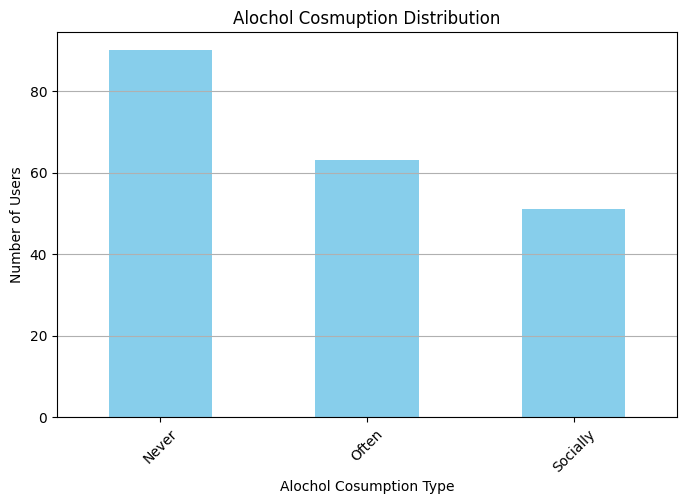

In [ ]:
## Creating the bar chart by defining the type of chart and chart size and color of bars
Alcohal.plot(kind='bar',figsize=(8,5),color='skyblue')

## This put the title of the chart
plt.title('Alochol Cosmuption Distribution')

## This Name the x axis of the chart
plt.xlabel('Alochol Cosumption Type')

## This will name of the y axis
plt.ylabel('Number of Users')

## This Rotate the label of X axis
plt.xticks(rotation=45)

## This will create the grid lines
plt.grid(axis='y')

plt.show()


Let us see what is the rating of the customers that visiting often to the restaurant.

In [ ]:
Visiting_often_rating = df.groupby(['Visited restaurant often'])['Overall Rating'].mean().sort_values(ascending=False)

In [ ]:
Visiting_often_rating

,Overall Rating
Visited restaurant often,
Yes,4.129630
No,3.107558


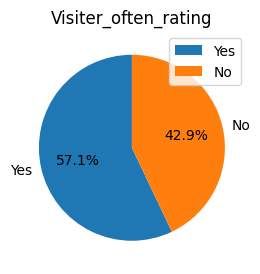

In [ ]:
Visiting_often_rating.plot(kind='pie',autopct='%1.1f%%',figsize=(3,4),startangle=90,legend=True)
plt.title('Visiter_often_rating')
plt.ylabel('')
plt.show()

This show that the Visiter who visited often give the nice rating to the restaurant.